In [4]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


# Sellers

🎯 Our goal is to find sellers who have repeatedly been underperforming vs. others, and understand why.  
This will help us shape our recommendations about how to improve Olist's profit margin for the future.

❗️ Long Notebook. Once you've read a section, you can collapse it.
<details>
    <summary> <i>[remainder] Notebook best practices</i></summary>

- Code your logic so that your Notebook can always be run from top to bottom without crashing (`Cell --> Run All`)
- Name your variables carefully 
- Use dummy names such as `tmp` for intermediary steps when you know you won't need them later
- Clear your code and merge cells when relevant to minimize Notebook size (`Shift-M`)
- Hide your cell output if you don't need to see it anymore (double click on the red `Out[]:` section to the left of your cell).
- Make heavy use of jupyter nbextention `Collapsable Headings` and `Table of Content` (call a TA if you can't find them)
- Use the following shortcuts 
    - `a` to insert a cell above
    - `b` to insert a cell below
    - `dd` to delete a cell
    - `esc` and `arrows` to move between cells
    - `Shift-Enter` to execute cell and move focus to the next one
    - use `Shift + Tab` when you're between method brackets e.g. `groupby()` to get the docs! Repeat a few times to open it permanently

</details>





## 1 - `olist/seller.py`  

In a process similar to `order.py`, we have coded for you the module `olist/seller.py` containing a class `Seller` with a method `Seller().get_training_data` that will return a DataFrame with the following features:
  
| feature_name 	| type 	| description 	|
|:---	|:---:	|:---	|
| `seller_id` 	| str 	| the id of the seller **UNIQUE** 	|
| `seller_city` 	| str 	| the city where seller is located 	|
| `seller_state` 	| str 	| the state where seller is located 	|
| `delay_to_carrier` 	| float 	| returns 0 if the order is delivered before the shipping_limit_date, otherwise the value of the delay 	|
| `wait_time` 	| float 	| average wait_time (duration of deliveries) per seller 	|
| `date_first_sale` 	| datetime 	| date of the first sale on Olist 	|
| `date_last_sale` 	| datetime 	| date of the last sale on Olist 	|
| `months_on_olist` 	| float 	| round number of months  on Olist	|
| `share_of_five_stars` 	| float 	| share of five-star reviews for orders in which the seller was involved 	|
| `share_of_one_stars` 	| float 	| share of one-star reviews for orders in which the seller was involved 	|
| `review_score` 	| float 	| average review score for orders in which the seller was involved 	|
| `n_orders` 	| int 	| number of unique orders the seller was involved with 	|
| `quantity` 	| int 	| total number of items sold by this seller 	|
| `quantity_per_order` 	| float 	| average number of items per order for this seller 	|
| `sales` 	| float 	| total sales associated with this seller (excluding freight value) in BRL 	|  

❓ **Import your new class below and check out your training dataframe !** Take time to look at the code and understand exactly what has been computed for you

In [3]:
# YOUR CODE HERE
from olist.seller import Seller
df = Seller().get_training_data()
df


,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_stars,share_of_one_stars
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000000,218.70,3.000000,0.333333,0.333333
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025000,11703.07,4.560976,0.731707,0.048780
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000000,158.00,5.000000,1.000000,NaN
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000000,79.99,5.000000,1.000000,NaN
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000000,167.99,1.000000,NaN,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,2,2,1.000000,158.00,5.000000,1.000000,NaN
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,10,10,1.000000,889.00,4.100000,0.500000,0.100000
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,6,7,1.166667,550.04,5.000000,1.000000,NaN
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,8,11,1.375000,297.00,4.454545,0.636364,NaN


🤔 One last thing remains to be computed for each seller:
* the proportion of extremely high reviews (`share_of_five_stars`) and the proportion of extremely poor reviews (`share_of_one_stars`)
* the (average) `review_score`

😱 Each low-rated order will indeed have a negative impact on Olist's reputation and this is modeled by the `cost_of_review`.  

This will help us compute the total `cost_of_review` per seller later on!

❓ **Implement the last method that has been left for you `get_review_score()`**

In [5]:
from olist.data import Olist
data = Olist().get_data()
data


{'sellers':                              seller_id  seller_zip_code_prefix  \
 0     3442f8959a84dea7ee197c632cb2df15                   13023   
 1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
 2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
 3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
 4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
 ...                                ...                     ...   
 3090  98dddbc4601dd4443ca174359b237166                   87111   
 3091  f8201cab383e484733266d1906e2fdfa                   88137   
 3092  74871d19219c7d518d0090283e03c137                    4650   
 3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
 3094  9e25199f6ef7e7c347120ff175652c3b                   12051   
 
             seller_city seller_state  
 0              campinas           SP  
 1            mogi guacu           SP  
 2        rio de janeiro           RJ  
 3             sao paul

In [8]:
# YOUR CODE HERE
"""
Returns a DataFrame with:
'seller_id', 'share_of_five_stars', 'share_of_one_stars', 'review_score'
"""
order_items = data['order_items'].copy()
orders = data['orders'].copy()
reviews = data['order_reviews'].copy()
sellers = data['sellers'].copy()
#df.copy()
#data['sellers'].copy()

sellers_reviews = reviews.merge(orders, on='order_id') \
                .merge(order_items, on='order_id') \
                .merge(sellers, on='seller_id')\
                .drop_duplicates(subset=['review_id'])\
                .dropna()



sellers_reviews.head(15)[['seller_id', 'review_score']].sort_values(by=['seller_id'])


,seller_id,review_score
7,6d803cb79cc31c41c4c789a75933b3c7,3
61,6d803cb79cc31c41c4c789a75933b3c7,5
120,8e6d7754bc7e0f22c96d255ebda59eba,1
211,a1043bafd471dff536d0c462352beb48,5
212,a1043bafd471dff536d0c462352beb48,1
216,a1043bafd471dff536d0c462352beb48,4
222,a1043bafd471dff536d0c462352beb48,4
225,a1043bafd471dff536d0c462352beb48,5
229,a1043bafd471dff536d0c462352beb48,3
238,a1043bafd471dff536d0c462352beb48,5


In [ ]:
sellers_reviews = pd.DataFrame(
                {
                    "review_score": sellers_reviews.groupby("seller_id")[
                        "review_score"
                    ].mean(),

                }
            ).reset_index()


sellers_reviews.head(5)
#[['seller_id', 'review_score']].query('seller_id == "6d803cb79cc31c41c4c789a75933b3c7"')


,seller_id,review_score
0,001cca7ae9ae17fb1caed9dfb1094831,5.000000
1,004c9cd9d87a3c30c522c48c4fc07416,3.666667
2,00720abe85ba0859807595bbf045a33b,1.000000
3,00ee68308b45bc5e2660cd833c3f81cc,4.500000
4,00fc707aaaad2d31347cf883cd2dfe10,3.000000


In [73]:
dff = Seller().get_review_score()
dff


,seller_id,review_score,share_of_five_stars,share_of_one_stars
0,001cca7ae9ae17fb1caed9dfb1094831,5.000000,1.000000,NaN
1,004c9cd9d87a3c30c522c48c4fc07416,3.666667,0.666667,0.333333
2,00720abe85ba0859807595bbf045a33b,1.000000,NaN,1.000000
3,00ee68308b45bc5e2660cd833c3f81cc,4.500000,0.500000,NaN
4,00fc707aaaad2d31347cf883cd2dfe10,3.000000,NaN,NaN
...,...,...,...,...
1469,ffad1e7127fb622cb64a900751590acd,5.000000,1.000000,NaN
1470,ffc470761de7d0232558ba5e786e57b7,3.800000,0.600000,0.200000
1471,ffdd9f82b9a447f6f8d4b91554cc7dd3,5.000000,1.000000,NaN
1472,ffeee66ac5d5a62fe688b9d26f83f534,1.000000,NaN,1.000000


🧪 Test your code below

In [82]:
from nbresult import ChallengeResult

tmp = Seller().get_training_data()
result = ChallengeResult('seller',
    shape = tmp.shape,
    median = tmp.review_score.median()
)
result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/04-Decision-Science/03-Linear-Regression/data-sellers/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_seller.py::TestSeller::test_median_review_score PASSED              [ 50%]
test_seller.py::TestSeller::test_shape PASSED                            [100%]

============================== 2 passed in 0.12s ===============================


💯 You can commit your code:

git add tests/seller.pickle

git commit -m 'Completed seller step'

git push origin master



## 2 - Sellers' Exploration

### (2.1) Plots

👉 Let's start with some initial ***`EDA - Exploratory Data Analysis`*** about these sellers.

- 📈 Plot the distribution of each numerical variable of the dataset in one large figure
- 👀 Do you notice any outliers?
- What's the median of orders per seller ❓
- How does the distribution of this variable look like ❓

In [9]:
# YOUR CODE HERE
df.describe()


,delay_to_carrier,wait_time,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_stars,share_of_one_stars
count,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2691.000000,1674.000000
mean,0.385636,12.139417,6.025615,33.650489,37.897203,1.157337,4568.852187,4.074920,0.649772,0.224797
std,2.295812,7.069233,5.994211,107.182856,121.514362,0.439557,14191.836779,0.824301,0.221676,0.213313
min,0.000000,1.214178,0.000000,1.000000,1.000000,1.000000,6.500000,1.000000,0.052632,0.010417
25%,0.000000,8.287658,1.000000,2.000000,3.000000,1.000000,239.850000,3.785714,0.500000,0.090909
50%,0.000000,11.115143,4.000000,7.000000,8.000000,1.000000,896.000000,4.200000,0.625000,0.143462
75%,0.000000,14.231984,10.000000,23.000000,26.000000,1.142857,3583.995000,4.636364,0.800000,0.272727
max,45.434039,189.863160,23.000000,1854.000000,2033.000000,15.000000,229472.630000,5.000000,1.000000,1.000000


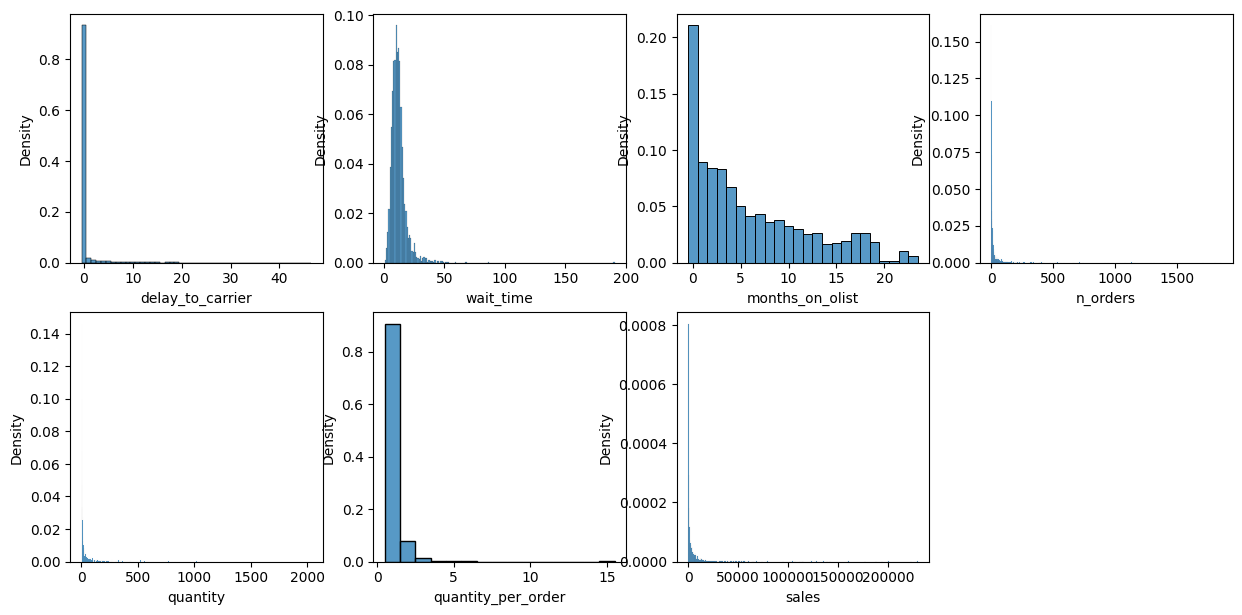

In [87]:
# YOUR CODE HERE
plt.figure(figsize=(15,11))
for (i, col) in enumerate(df.describe().columns):#["wait_time", "delay_to_carrier", "avg_review_score", "n_orders", "quantity", "price"]):
    plt.subplot(3,4,i+1)
    sns.histplot(df[col], kde=False, stat='density', discrete=[True,None][col in ['share_of_one_stars','share_of_five_stars','sales']]);


💡There seems to be a group of sellers which stands out for having very low review scores! 

📊 Let's investigate graphically it:
* Using `plotly`, create a `scatterplot` of `delay_to_carrier` against `wait_time`, varying bubble size by total `sales` for that seller, and coloring by `review_score`. 

In [10]:
# YOUR CODE HERE
import plotly.express as px
fig = px.scatter(data_frame = df[df['review_score'] < 4],
    x="wait_time",
    y="delay_to_carrier",
    size="sales",
    color="review_score",
    size_max = 60,
    opacity = 0.5
)
fig.show()


Feel free to change values `x`, `y`, `color` and `size` to try identify who are the worst sellers

### (2.2) Model out `review_score` with OLS

⚠️ Scatter plots have their limits. 

💡 A more rigorous way to explain **`sellers' review_score`** is to **model the impact of various features on `review_score` with a `multivariate-OLS` in `statsmodels`**.

👉 Create an OLS with numerical features of your choice. 

❓ What are the most impactful ones? 

⚠️ Don't forget to standardize your features using the `standardize`function below to compare the regression coefficients together. 

In [11]:
def standardize(df, features):
    df_standardized = df.copy()
    for f in features:
        mu = df[f].mean()
        sigma = df[f].std()
        df_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
    return df_standardized


In [12]:
# YOUR CODE HERE
features = ['delay_to_carrier', 'wait_time', 'n_orders', 'quantity', 'quantity_per_order', 'sales']
sellers_standardized = standardize(df, features)
model = smf.ols(formula=f"review_score ~ {'+ '.join(features)}", data=sellers_standardized).fit()


📊 Draw a `bar_plot` with sorted coefficients.

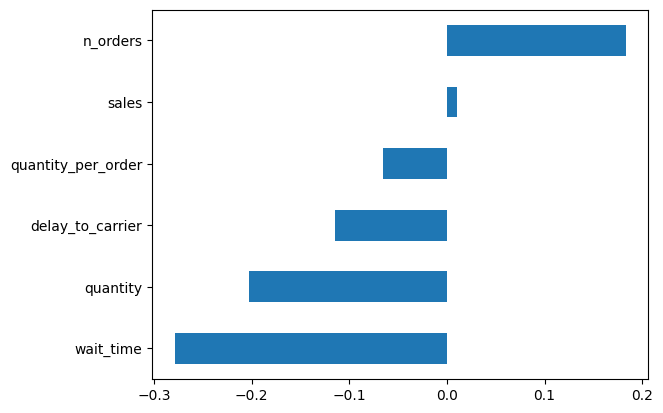

In [13]:
# YOUR CODE HERE
model.params[1:].sort_values().plot(kind='barh');


👉 Finally, investigate your model's performance (`R-squared`) and `residuals`

In [14]:
# YOUR CODE HERE
model.rsquared


0.18684057694675693

👉 Compare the real review scores and the predicted scores by showing them on the same graph.

<AxesSubplot:xlabel='review_score', ylabel='Density'>

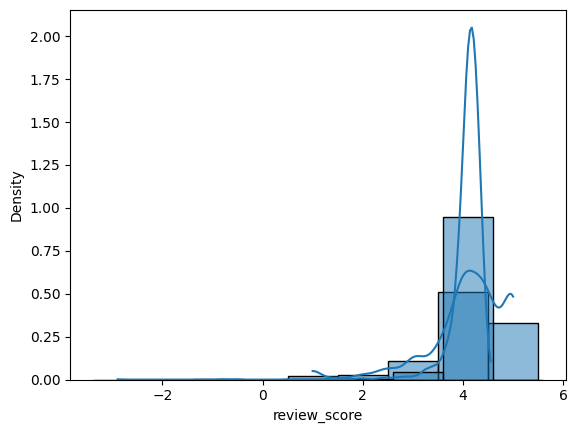

In [15]:
# YOUR CODE HERE
sns.histplot(df.review_score, kde=True, stat='density', discrete=True)
sns.histplot(model.predict(sellers_standardized[features]), kde=True, stat='density', discrete=True)


👉 Plot the residuals

<AxesSubplot:ylabel='Density'>

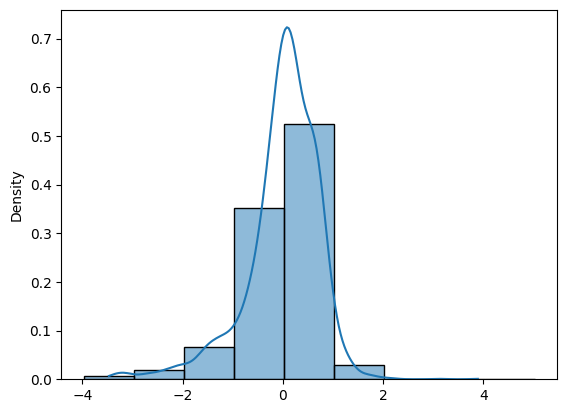

In [16]:
# YOUR CODE HERE
sns.histplot(model.resid, kde=True, stat='density', discrete=True)


### (2.3) Add the `seller_state` to your analysis

❓ We haven't used information about `seller_state` yet.  
- Create a new OLS model regressing `review_score` on only on `seller_states` .
- Analyse your significant features using `return_significative_coef(model)` coded for you in `olist/utils.py`
- What are the best states in terms of `review_score`? 

<details>
    <summary>- Hints -</summary>
        
⚠️ Be careful, `seller_state` is a categorical feature. 
    
💡 Use `C(a_cat_feature)` in the formula to tell the linear regression model which variables are categorical variables. It will create one boolean variable `is_cat_feature_xx` **per unique category** 

</details>

In [18]:
# YOUR CODE HERE
model2 = smf.ols(formula='review_score ~ C(seller_state)', data=df).fit()

# top 5 coef with p-value < 0.05
from olist.utils import return_significative_coef
return_significative_coef(model2).head()


,variable,p_value,coef
0,Intercept,0.004692,2.333333
16,C(seller_state)[T.RN],0.017234,2.152614
4,C(seller_state)[T.ES],0.015239,2.047204
8,C(seller_state)[T.MS],0.030525,1.955000
11,C(seller_state)[T.PB],0.029107,1.944444


☝️ Some states indeed have _significantly_ better reviews than others on average. 

🤔 Is it due to some lower `quantity_per_order`, lower `wait_time`, or `delay_to_carrier`?  Or is it due to some other factors that we haven't collected data about?

❓ **Try to isolate the impact of the `seller_state` from the rest by adding other continuous features to your OLS until `seller_states` is no longer statistically siginificant!**

In [19]:
# YOUR CODE HERE
formula = 'review_score ~  sales + quantity + quantity_per_order + C(seller_state)'
model3 = smf.ols(formula=formula, data=df).fit()
return_significative_coef(model3).head(5+1)[1:]


,variable,p_value,coef
16,C(seller_state)[T.RN],0.016280,2.163358
4,C(seller_state)[T.ES],0.013824,2.069100
8,C(seller_state)[T.MS],0.029710,1.957293
11,C(seller_state)[T.PB],0.027844,1.952623
9,C(seller_state)[T.MT],0.040152,1.885717


In [20]:
# YOUR CODE HERE
formula = 'review_score ~ wait_time + C(seller_state)'
model3 = smf.ols(formula=formula, data=df).fit()
return_significative_coef(model3).head(5+1)[1:]


,variable,p_value,coef
22,wait_time,1.479050e-117,-0.047765


☝️ After adding `wait_time` to our analysis, none of the 22 dummy variables `is_seller_state_xx` are statistically signigicant:

Given our small dataset (most states have a very limited number of sellers):
- We _cannot conclude_ that "some states are inherently better than other for reasons that would be independent of the `wait_time`" 
- In other words, we _cannot reject the hypothesis_ that "seller_state has no impact on review_score, other than through `wait_time`"

🏁 Congratulations!

💾 Commit and push :
* your ` sellers.ipynb`notebook 
* as well as `seller.py`